<a href="https://colab.research.google.com/github/JUNYA-727/SIGNATE/blob/main/TECHNOPRO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image,ImageDraw
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import shutil
import glob
import os
from tensorflow import keras
import cv2

patarnわけされたフォルダに

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/signate/patern/A')))
print(len(os.listdir('/content/drive/MyDrive/signate/patern/B')))
print(len(os.listdir('/content/drive/MyDrive/signate/patern/C')))
print(len(os.listdir('/content/drive/MyDrive/signate/patern/D')))

1150
1150
1150
1150


**labelデータとして必要なもの､0(物体のラベル),x1,y1,x2,y2**

In [ ]:
with open('/content/drive/MyDrive/signate/train_annotations.tsv',encoding='utf-8',newline='') as f:
    reader = csv.reader(f,delimiter='\t')
    # ヘッダ行だけを読み込んで、スペース区切りで表示
    header = next(reader)
    print(' '.join(header))
    #val用データを切り分けるため
    a_count=0
    b_count=0
    c_count=0
    d_count=0
    base_dir='/content/drive/MyDrive/signate/train 2'
    for cols in reader:
      datalist=[]
      image_path=os.path.join(base_dir,cols[0]+'.png')
      if cols[1]=='1':
        image=Image.open(image_path)
        W,H=image.size
        x=float(cols[6])
        y=float(cols[7])
        semi=float(cols[3])
        label=str(cols[1])
        x1=(x-semi)
        x2=(x+semi)
        y1=(y-semi)
        y2=(y+semi)

        x=((x1+x2)/2)/W
        y=((y1+y2)/2)/H
        w=(x2-x1)/W
        h=(y2-y1)/H

        datalist.append('0')
        datalist.append(str(x))
        datalist.append(str(y))
        datalist.append(str(w))
        datalist.append(str(h))

      image_path=os.path.join(base_dir,cols[0]+'.png')
      if (cols[1]=='1')and(cols[2]=='A'):
        a_count+=1
        #val用のデータは5枚にする
        if a_count<6:
          new_path=os.path.join('/content/drive/MyDrive/signate/A_data/images/val',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/A_data/labels/val',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
        else:
          new_path=os.path.join('/content/drive/MyDrive/signate/A_data/images/train',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/A_data/labels/train',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
      if (cols[1]=='1')and(cols[2]=='B'):
        b_count+=1
        if b_count<6:
          new_path=os.path.join('/content/drive/MyDrive/signate/B_data/images/val',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/B_data/labels/val',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
        else:
          new_path=os.path.join('/content/drive/MyDrive/signate/B_data/images/train',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/B_data/labels/train',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
      if (cols[1]=='1')and(cols[2]=='C'):
        c_count+=1
        if c_count<6:
          new_path=os.path.join('/content/drive/MyDrive/signate/C_data/images/val',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/C_data/labels/val',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
        else:
          new_path=os.path.join('/content/drive/MyDrive/signate/C_data/images/train',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/C_data/labels/train',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
      if (cols[1]=='1')and(cols[2]=='D'):
        d_count+=1
        if d_count<6:
          new_path=os.path.join('/content/drive/MyDrive/signate/D_data/images/val',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/D_data/labels/val',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))
        else:
          new_path=os.path.join('/content/drive/MyDrive/signate/D_data/images/train',cols[0]+'.jpg')
          shutil.copy(image_path,new_path)
          txt_path=os.path.join('/content/drive/MyDrive/signate/D_data/labels/train',cols[0]+'.txt')
          open(txt_path,'w').write(' '.join(datalist))


id label pattern semi_major_axis semi_minor_axis rotation_angle x_position y_position


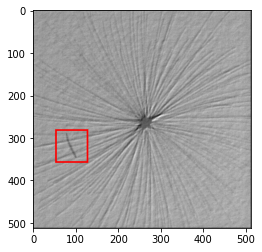

In [ ]:
#確認としてしっかりラベルが対応しているか
line=open('/content/drive/MyDrive/signate/A_data/labels/train/train_0127.txt','r')
for i in line.readlines():
  label,x,y,w,h=i.split(' ')
image=Image.open('/content/drive/MyDrive/signate/A_data/images/train/train_0127.jpg')
if image.mode != "RGB":
  image = image.convert("RGB")
W,H=image.size
draw=ImageDraw.Draw(image)
x1=(float(x)-float(w)/2)*W
x2=(float(x)+float(w)/2)*W
y1=(float(y)-float(h)/2)*H
y2=(float(y)+float(h)/2)*H
draw.rectangle((x1,y1,x2,y2),outline=(255,0,0),width=4)
plt.imshow(image)
plt.show()

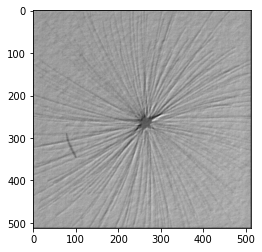

In [ ]:
image=Image.open('/content/drive/MyDrive/signate/A_data/images/train/train_0127.jpg')
image=image.convert('RGB')
image.save('/content/dad.jpg')
plt.imshow(image)

In [ ]:
cd /content/drive/MyDrive/signate/A_data

/content/drive/MyDrive/signate/A_data


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 10152, done.
remote: Total 10152 (delta 0), reused 0 (delta 0), pack-reused 10152
Receiving objects: 100% (10152/10152), 10.45 MiB | 8.39 MiB/s, done.
Resolving deltas: 100% (7035/7035), done.


In [ ]:
pip install -U -r yolov5/requirements.txt

      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pwd

/content


In [ ]:
!python yolov5/train.py --batch 32 --epochs 1000 --data '/content/drive/MyDrive/signate/signate2/signate2.yaml' 

In [ ]:
!python yolov5/detect.py --weights /content/drive/MyDrive/signate/A_data/yolov5/runs/train/exp5/weights/best.pt --source /content/drive/MyDrive/signate/A_data/images/val      

detect: weights=['/content/drive/MyDrive/signate/A_data/yolov5/runs/train/exp5/weights/best.pt'], source=/content/drive/MyDrive/signate/A_data/images/val, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-9 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/5 /content/drive/MyDrive/signate/A_data/images/val/train_0028.jpg: 640x640 1 objection, Done. (0.014s)
image 2/5 /content/drive/MyDrive/signate/A_data/images/val/train_0033.jpg: 640x640 1 objection, Done. (0.017s)
image 3/5 /content/drive/MyDrive/signate/A_data/images/val/train_0038.jpg: 640x640 1 obje

In [ ]:
tensorflow_model=keras.models.load_model('/content/drive/MyDrive/signate/Tensorflow_model.h5')
image_path=cv2.imread('/content/drive/MyDrive/signate/A_data/images/train/train_0127.jpg')
image=image_path/255.0
image=image.reshape(1,512,512,3)
scores=tensorflow_model.predict(image)[0]
print(scores)


[9.9999714e-01 9.1187657e-10 3.6685836e-15 2.8647619e-06]


In [ ]:
def check_patern(image_path):
  image=cv2.imread(image_path)
  image=image/255.0
  image=image.reshape(1,512,512,3)
  scores=tensorflow_model.predict(image)[0]
  
  return scores